/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


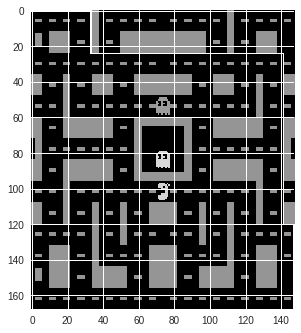

In [0]:
import networkx as nx # great library that implements a lot of useful (and efficient) data structures and algorithms for graphs
import numpy as np
import gym
import matplotlib.pyplot as plt


class State(object):
    '''
    Depict the state as a graph of all the pixels which can be crossed at any time
    by Pacman. in order to be a node, a pixel needs to lie in a corridor. Each different pixel
    can be connected to any of the four Von Neumann neighbors (up, right, down, left), provided 
    they are admissible. The NetworkX library is used.
    '''
    def __init__(self, screen):
        '''
        Use an attribute for screen and one for the graph.
        '''
        self.screen = screen #screen is likely to be the output of env.env.ale.getScreen()
        self.graph = nx.Graph() #NetworkX-provided data structure to represent a graph
    
    def create_graph(self):
        '''
        Initializes the graph. 
        '''
        m, n = np.shape(self.screen)
        
        # Loop over all pixels
        for row in range(m):
            for col in range(n):
                color = self.screen[row, col]
                if color != 144: # discard if not in the corridor
                    continue
                else:
                    if (row, col) not in self.graph.nodes:
                        self.graph.add_node((row, col)) #add node to the graph
                    
                    # Loop over the neighbors and establish edge if necessary
                    for offset in [(0, 1), (0, -1), (-1, 0), (1, 0)]:
                        neighbor = row + offset[0], col + offset[1]
                        if 0 <= neighbor[0] <= 167 and 0 <= neighbor[1] <= 147 and self.screen[neighbor[0], neighbor[1]] == 144: # if not out of bounds and colored appropriately
                            self.graph.add_edge((row, col), neighbor)
                            
        # As you may notice, not all the pixels colored like the corridors can actually be crossed during the gameplay.
        # In particular, there is the central square, two stripes on the borders, the eyes of the ghosts and of Pacman.
        # We can easily discard them by computing the connected components and keeping the one with the most nodes,
        # which clearly represents the space we are looking for
        corridors = set(sorted(nx.connected_components(self.graph), key=len)[-1])
        
        # Remove the nodes we do not need anymore
        for node in set(self.graph.nodes):
            if node not in corridors:
                self.graph.remove_node(node)
    
    def update(self, new_screen):
        '''
        Updates the internal screen representation
        '''
        self.screen = new_screen
      
    def get_distance(self, source, target):
        '''
        Computes the shortest distance from source to target.
        Source is likely to be Pacman, while targets can be the ghosts for example.
        '''
        return nx.shortest_path_length(self.graph, source, target)
    
    def display_path(self, source, target):
        '''
        Input source and target and this function will display the shortest path.
        Used for testing.
        '''
        if source not in self.graph.nodes or target not in self.graph.nodes:
          print("One or more of the locations cannot be crossed")
          return
        path = nx.shortest_path(self.graph, source, target)
        for pixel in path:
            self.screen[pixel[0], pixel[1]] = 3
        plt.imshow(self.screen)
        plt.show()
        
        
# MsPacman-ram-v0
env = gym.make('MsPacman-ram-v0')
env.reset();
screen_raw = env.env.ale.getScreen().reshape(210, 160)
screen_raw = screen_raw[2:170, 6:154]
test = State(screen_raw)
test.create_graph()
test.display_path((0, 0), (167, 147))